In [1]:
import pandas as pd
import pingouin as pg
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('nationwide_data.csv', low_memory=False)


In [3]:
print(df.shape)

# Print column names.
for col in df.columns:
    print(col)


(5937, 188)
agency_name
location_name
agency_type
state
fips_state_code
fips_place_code
fips_county_code
fips_county_sub_code
latitude
longitude
ori
total_population
white_population
black_population
hispanic_population
asian_pacific_population
other_population
mayor_name
mayor_email
mayor_phone
mayor_contact_url
police_chief_name
police_chief_email
police_chief_phone
police_chief_contact_url
less_lethal_force_2016
less_lethal_force_2017
less_lethal_force_2018
police_shootings_2016
police_shootings_2017
police_shootings_2018
white_people_killed
black_people_killed
hispanic_people_killed
asian_pacific_people_killed
other_people_killed
unarmed_people_killed
vehicle_people_killed
armed_people_killed
fatality_rate
shot_first
people_killed_or_injured_armed_with_gun
people_killed_or_injured_gun_perceived
people_killed_or_injured_unarmed
people_killed_or_injured_vehicle_incident
people_killed_or_injured_black
people_killed_or_injured_white
people_killed_or_injured_hispanic
people_killed_or_in

In [54]:
df2 = df.copy()

# Strip dollar sign, cast police budget column as a float.
df2['total_population'] = df2['total_population'].str.replace(',', '').astype('float64')

df2['police_budget'] = df2['police_budget'].str.replace(',', '')
df2['police_budget'] = df2['police_budget'].str.replace('$', '')
df2['police_budget'] = df2['police_budget'].astype('float64')/df2['total_population']

df2['all_people_killed'] = (df2['white_people_killed'] 
                                 + df2['black_people_killed'] 
                                 +  df2['hispanic_people_killed'] 
                                 +  df2['asian_pacific_people_killed']
                                 + df2['other_people_killed'])/df2['total_population']

df2['less_lethal_force_all'] = (df2['less_lethal_force_2016'] +
                               df2['less_lethal_force_2017'] + 
                               df2['less_lethal_force_2018'])/df2['total_population']

df2['percent homicides solved'] = df2['homicides_2013_2018_solved']/df2['homicides_2013_2018']

# Remove values of inf from the table, since we divided by total population.
df2 = df2[df2['total_population'] != 0]


In [55]:
df2

,agency_name,location_name,agency_type,state,fips_state_code,fips_place_code,fips_county_code,fips_county_sub_code,latitude,longitude,...,Female Employees Officers 2013,Female Employees Officers 2014,Female Employees Officers 2015,Male Employees Officers 2016.1,Female Employees Officers 2017,Female Employees Officers 2018,include_in_scorecard,all_people_killed,less_lethal_force_all,percent homicides solved
0,NEW YORK,NEW YORK,police-department,NY,36,51000,61,NaN,40.7123,-74.0017,...,5890.0,5868.0,6078.0,6334.0,6492.0,6484.0,1,0.000009,NaN,0.760041
1,LOS ANGELES,LOS ANGELES,police-department,CA,6,44000,37,NaN,34.0521,-118.2411,...,1869.0,1881.0,1854.0,1821.0,1842.0,1841.0,2,0.000031,0.000482,0.787692
2,CHICAGO,CHICAGO,police-department,IL,17,14000,31,NaN,41.8306,-87.6238,...,2678.0,2708.0,2678.0,2645.0,2768.0,2984.0,3,0.000028,0.000470,0.416341
3,HOUSTON,HOUSTON,police-department,TX,48,35000,201,NaN,29.9683,-95.3614,...,650.0,807.0,815.0,826.0,846.0,864.0,4,0.000030,NaN,0.591164
4,PHOENIX,PHOENIX,police-department,AZ,4,55000,13,NaN,33.4488,-112.0820,...,380.0,365.0,358.0,350.0,369.0,395.0,5,0.000067,0.000431,0.661104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5928,KENEDY,KENEDY COUNTY,sheriff,TX,48,99261,261,NaN,27.2216,-97.7891,...,0.0,0.0,0.0,0.0,0.0,0.0,5929,0.000000,NaN,NaN
5929,FOARD,FOARD COUNTY,sheriff,TX,48,99155,155,NaN,33.9839,-99.7236,...,0.0,0.0,0.0,0.0,0.0,0.0,5930,0.002865,NaN,NaN
5930,KING,KING COUNTY,sheriff,TX,48,99269,269,NaN,33.6203,-100.3220,...,0.0,0.0,0.0,0.0,0.0,0.0,5931,0.000000,NaN,NaN
5931,COTTLE,COTTLE COUNTY,sheriff,TX,48,99101,101,NaN,33.8087,-100.5170,...,0.0,0.0,0.0,0.0,0.0,0.0,5932,0.000000,NaN,NaN


In [56]:
pg.partial_corr(data=df2, x='police_budget', y='all_people_killed',
                covar=['homicides_2013_2018'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,2696,0.746963,"[0.73, 0.76]",0.557953,0.557625,0.0,inf,1.0


In [57]:
pg.partial_corr(data=df2, x='police_budget', y='less_lethal_force_all', covar=['homicides_2013_2018', 'total_population'])




,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,86,0.232871,"[0.02, 0.42]",0.054229,0.031439,0.03095,1.329,0.584017


In [58]:
def partial_correlation_matrix(df2, variables, control_vars):
    """
    Compute correlation matrix.
    Args:
        variables: list of variable names to compute correlations between.
        control_var: string or list, variable name(s) to control for.
    """
    n = len(variables)
    corr = np.zeros((n, n))
    for i, var1 in enumerate(variables):
        for j, var2 in enumerate(variables):
            if var1 == var2:
                r = 1.0
            else:
                r = float(pg.partial_corr(data=df2, x=var1, y=var2, covar=control_var)['r'])
            corr[i, j] = r
    return corr

In [59]:
corr = partial_correlation_matrix(df2, ['police_budget', 'all_people_killed', 'less_lethal_force_all', 'percent homicides solved'], ['homicides_2013_2018', 'total_population'])
corrdf = pd.DataFrame(data=corr, index=['Police budget', 'Non-lethal force incidents', 'Lethal force incidents', 'Percent Homicides Solved'], columns=['Police budget', 'Non-lethal force incidents', 'Lethal force incidents', 'Percent Homicides Solved'])


In [60]:
def correlation_heatmap(corr, title):
    sns.set(style="white")

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corrdf, dtype=np.bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corrdf, mask=mask, cmap=cmap, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
    plt.yticks(rotation=0) 

    plt.title(title, fontsize=20)
    plt.show()
   

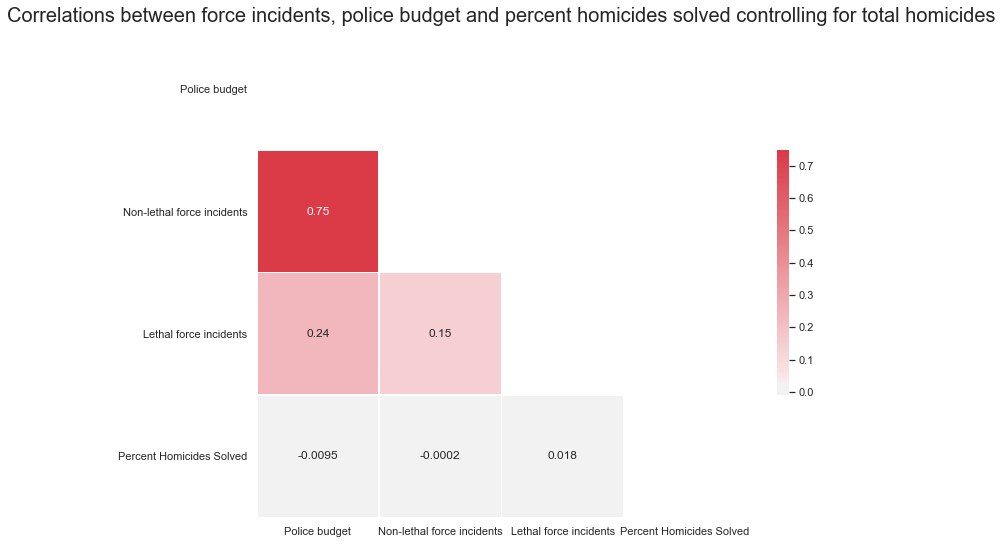

In [61]:
correlation_heatmap(corrdf, 'Correlations between force incidents, police budget and percent homicides solved controlling for total homicides')